## Density - pericenter slope

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from scipy import stats
import os

from density_profile_fit_utils import fit_nfw_model, fit_core_nfw_model, fit_isothermal_model
from density_profile_utils import NFW_profile
from density_pericenter_fit_utils import run_best_fit_for_sim

In [2]:
import matplotlib

plt.style.use("pltstyle.mplstyle")
mycmap = matplotlib.cm.RdYlBu
myblue = mycmap(0.9)
myred =  mycmap(0.1)
color_list = ['olivedrab', myblue, 'peru', myred, 'darkorchid'] # 'midnightblue'])

In [3]:
DATA_PATH = "../data/TangoSIDM/"

IDs = {
    "SigmaConstant00": "CDM",
    "SigmaConstant01": "SigmaConstant01",
#    "SigmaConstant10": "SigmaConstant10", # I will not include this sim. since its cross section is already ruled out by galaxy clusters
    "SigmaVelDep20Anisotropic": "SigmaVel20",
    "SigmaVelDep60Anisotropic": "SigmaVel60", 
    "SigmaVelDep100Anisotropic": "SigmaVel100",
}

In [4]:
from scipy.optimize import curve_fit
from density_pericenter_fit_utils import log_model, run_best_fit_for_sim

GAIA_PATH = "../data/Gaia/"
Kaplinghat_data = pd.read_csv(GAIA_PATH+"Kaplinghat_2019.csv").to_numpy()
Read_data = pd.read_csv(GAIA_PATH+"Read_2019.csv").to_numpy()

dSph = Kaplinghat_data[:,0]
dSph = dSph[::2]

num_satellites = len(dSph)

# We remove CVnI
num_satellites = 8
dSph = dSph[:-1]

r_p_Isolated = np.zeros((3,num_satellites)) # Reading pericenter assuming isolated MW
r_p_LMC = np.zeros((3,num_satellites))      # Reading pericenter assuming MW perturbed by LMC
rho_150pc_K19 = np.zeros((3,num_satellites)) # Reading Kaplinghat+ 2019 determination under NFW
rho_150pc_R19 = np.zeros((3,num_satellites)) # Reading Read+ 2019 determination under core-NFW
rho_150pc_K19ISO = np.zeros((3,num_satellites)) # Reading Kaplinghat+ 2019 determination under Isothermal


for i, dSphi in enumerate(dSph):
    filename = "Cardona_2023_"+dSphi+".csv"
    data = pd.read_csv(GAIA_PATH + filename).to_numpy()
    r_p_Isolated[0,i] = data[2,0] # Pericenter [kpc]
    r_p_Isolated[1,i] = data[2,1] # (Error) Pericenter [kpc]
    r_p_Isolated[2,i] = data[2,2] # (Error) Pericenter [kpc]
    r_p_LMC[0,i] = data[3,0] # Pericenter [kpc]
    r_p_LMC[1,i] = data[3,1] # Pericenter [kpc]
    r_p_LMC[2,i] = data[3,2] # Pericenter [kpc]
    rho_150pc_K19[0,i] = data[8,0] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_K19[1,i] = data[8,1] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_K19[2,i] = data[8,2] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_K19ISO[0,i] = data[9,0] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_K19ISO[1,i] = data[9,1] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_K19ISO[2,i] = data[9,2] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_R19[0,i] = data[6,0] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_R19[1,i] = data[6,1] * 1e7 # Central density [Msun/kpc^3]
    rho_150pc_R19[2,i] = data[6,2] * 1e7 # Central density [Msun/kpc^3]
    
    
# We do the fitting for observations (NFW)

popt_p_Isolated, pcov = curve_fit(log_model, np.log10(r_p_Isolated[0,:]), np.log10(rho_150pc_K19[0,:]/1e7))
perr_p_Isolated = np.sqrt(np.diag(pcov))
print(popt_p_Isolated, perr_p_Isolated)
popt_p_LMC, pcov = curve_fit(log_model, np.log10(r_p_LMC[0,:]), np.log10(rho_150pc_K19[0,:]/1e7))
perr_p_LMC = np.sqrt(np.diag(pcov))
print(popt_p_LMC, perr_p_LMC)

# We do the fitting for observations (ISO)

popt_p_Isolated_ISO, pcov_ISO = curve_fit(log_model, np.log10(r_p_Isolated[0,:]), np.log10(rho_150pc_K19ISO[0,:]/1e7))
perr_p_Isolated_ISO = np.sqrt(np.diag(pcov_ISO))
print(popt_p_Isolated_ISO, perr_p_Isolated_ISO)
popt_p_LMC_ISO, pcov_ISO = curve_fit(log_model, np.log10(r_p_LMC[0,:]), np.log10(rho_150pc_K19ISO[0,:]/1e7))
perr_p_LMC_ISO = np.sqrt(np.diag(pcov_ISO))
print(popt_p_LMC_ISO, perr_p_LMC_ISO)

# We do the fitting for observations (cNFW)

popt_p_Isolated_cNFW, pcov_cNFW = curve_fit(log_model, np.log10(r_p_Isolated[0,:]), np.log10(rho_150pc_R19[0,:]/1e7))
perr_p_Isolated_cNFW = np.sqrt(np.diag(pcov_cNFW))
print(popt_p_Isolated_cNFW, perr_p_Isolated_cNFW)
popt_p_LMC_cNFW, pcov_cNFW = curve_fit(log_model, np.log10(r_p_LMC[0,:]), np.log10(rho_150pc_R19[0,:]/1e7))
perr_p_LMC_cNFW = np.sqrt(np.diag(pcov_cNFW))
print(popt_p_LMC_cNFW, perr_p_LMC_cNFW)

[ 2.30112007 -0.66128207] [0.58704218 0.34001611]
[ 1.51969014 -0.19019314] [0.84792992 0.4520326 ]
[ 3.09456537 -1.18637109] [0.94292005 0.54614135]
[ 2.11653988 -0.5678892 ] [1.37961341 0.73547379]
[ 1.87040757 -0.41074682] [0.54078178 0.31322199]
[ 1.35839351 -0.10389114] [0.69953822 0.37292477]


## Slope plots

In [5]:
MAX_SATELLITES = 8

#### Best fit

CDM NFW: -0.03961296908159897
CDM cNFW: -0.11630671443324095
CDM ISO: -0.06902493507371282
SigmaConstant01 NFW: 0.02140639894041756
SigmaConstant01 cNFW: 0.15691348326975374
SigmaConstant01 ISO: 0.033565349197643556
SigmaVel20 NFW: 0.007072499099923463
SigmaVel20 cNFW: 0.08978601901632585
SigmaVel20 ISO: 0.019391631187747897
SigmaVel60 NFW: -0.039529140108166695
SigmaVel60 cNFW: -0.01805538441754725
SigmaVel60 ISO: 0.01932112297999282
SigmaVel100 NFW: -0.1203144723154055
SigmaVel100 cNFW: -0.08566977342406355
SigmaVel100 ISO: -0.153032936561131
-0.6612820660845732 0.34001610896431583
-0.19019314031345486 0.4520325960392126


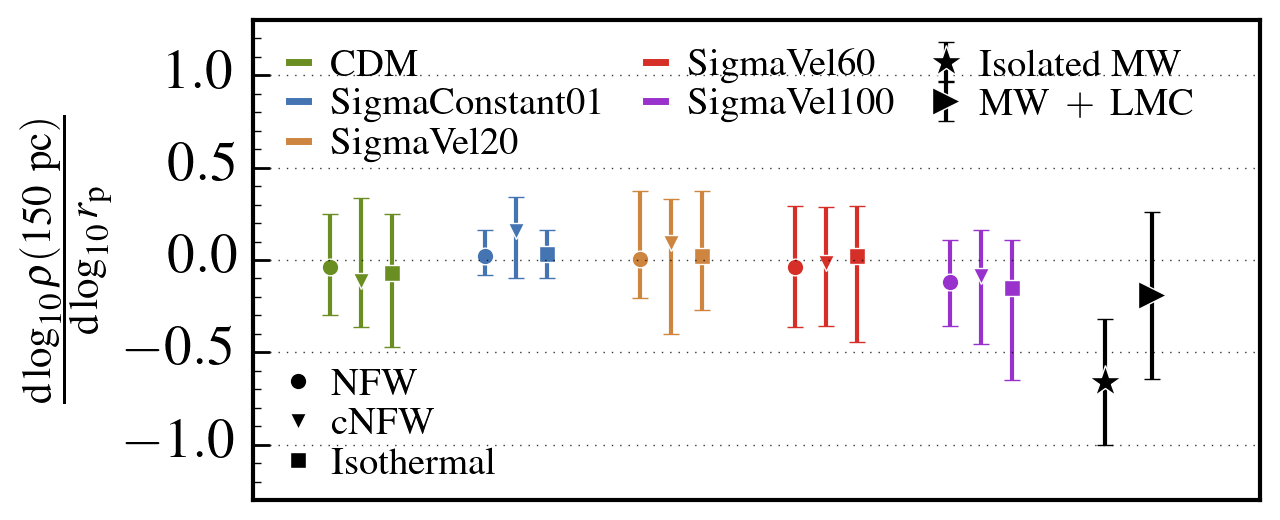

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 3), dpi=200)

for i, (id, id_name) in enumerate(IDs.items()):
    file = h5py.File(DATA_PATH+f"{id}.hdf5", "a")

    q_nfw, q_core_nfw, q_iso = [], [], []
    m_nfw, m_core_nfw, m_iso = [], [], []
    # Add simulations points
    for idx in file.keys():

        if file[f'{idx}'].attrs.get("main_halo_of") is not None:   
            subhalo_idxs = file[f'{idx}'].attrs.get("main_halo_of")

            rp, rho150_nfw, rho150_core_nfw, rho150_iso, M200 = [], [], [], [], []
            counter = 0
            # Get satellites of MW halo
            for subhalo_idx in subhalo_idxs[:MAX_SATELLITES]:
                if np.log10(file[str(subhalo_idx)]['tree_data']['bound_mass_dm'][0]) > 9: # MINIMUM satellite mass = 10^9
                    data_subhalo = file[f'{subhalo_idx}']

                    # Get pericenter
                    _rp = data_subhalo["tree_data"]["pericenter"][1]
                    _rp = _rp[0] if _rp.shape==(1,) else _rp
                    rp = np.append(rp, _rp)

                    # Get NFW profile
                    nfw_fit = data_subhalo['halo_data']['nfw_fit']
                    r_s, log10_rho_s, sigma_r_s, sigma_log10_rho_s = nfw_fit
                    _rho_150 = 10**fit_nfw_model(np.array([0.15]), r_s, log10_rho_s)
                    rho150_nfw = np.append(rho150_nfw, _rho_150[0])
                    
                    # Get core-NFW profile
                    core_nfw_fit = data_subhalo['halo_data']['core_nfw_fit']
                    log10_M_200, r_c, n, sigma_log10_M200, sigma_r_c, sigma_n = core_nfw_fit
                    _rho_150 = 10**fit_core_nfw_model(np.array([0.15]), log10_M_200, r_c, n)
                    rho150_core_nfw = np.append(rho150_core_nfw, _rho_150[0])
                    
                    # Get ISO profile
                    iso_fit = data_subhalo['halo_data']['iso_fit'][:]
                    r_0, log10_rho_0, sigma_r_0, sigma_log10_rho_0 = iso_fit
                    _rho_150 = 10**fit_isothermal_model(np.array([0.15, 0.15]), r_0, log10_rho_0)
                    rho150_iso = np.append(rho150_iso, _rho_150[0])
                    
                    counter+=1
            
            
            if counter<8: continue# Fit only systems with at least 8 satellites
            # Fit NFW
            _q, _m = run_best_fit_for_sim(rp, rho150_nfw)
            q_nfw = np.append(q_nfw, _q)
            m_nfw = np.append(m_nfw, _m)
            
            # Fit core-NFW
            _q, _m = run_best_fit_for_sim(rp, rho150_core_nfw)
            q_core_nfw = np.append(q_core_nfw, _q)
            m_core_nfw = np.append(m_core_nfw, _m)
            
            # Fit ISO
            _q, _m = run_best_fit_for_sim(rp, rho150_iso)
            q_iso = np.append(q_iso, _q)
            m_iso = np.append(m_iso, _m)
    

    merr = np.zeros((2, 1))
    merr[0,0]= np.median(m_nfw) - np.percentile(m_nfw,16)
    merr[1,0]= np.percentile(m_nfw,84) - np.median(m_nfw)
    plt.errorbar(np.array([i]), np.array(np.median(m_nfw)), yerr=merr, marker='o', markersize=6, color=color_list[i],
                 markeredgecolor="white", ls='none', lw=1.5) #, label=fr'$\mathrm{{{id_name}}}$')
    print(f"{id_name} NFW: {np.median(m_nfw)}")
    
    merr = np.zeros((2, 1))
    merr[0,0]= np.median(m_core_nfw) - np.percentile(m_core_nfw,16)
    merr[1,0]= np.percentile(m_core_nfw,84) - np.median(m_core_nfw)
    plt.errorbar(np.array([i])+0.2, np.array(np.median(m_core_nfw)), yerr=merr, marker='v', markersize=6, color=color_list[i],
                 markeredgecolor="white", ls='none', lw=1.5) #, label=fr'$\mathrm{{{id_name}}}$')
    print(f"{id_name} cNFW: {np.median(m_core_nfw)}")
    
    merr = np.zeros((2, 1))
    merr[0,0]= np.median(m_iso) - np.percentile(m_iso,16)
    merr[1,0]= np.percentile(m_nfw,84) - np.median(m_iso)
    plt.errorbar(np.array([i])+0.4, np.array(np.median(m_iso)), yerr=merr, marker='s', markersize=6, color=color_list[i],
                 markeredgecolor="white", ls='none', lw=1.5) #, label=fr'$\mathrm{{{id_name}}}$')
    print(f"{id_name} ISO: {np.median(m_iso)}")
    
    plt.plot([], [], color=color_list[i], lw=2.5, label=fr'$\mathrm{{{id_name}}}$')

    ####
    file.close()

plt.grid('True')
# Plot rho_K19NFW + rp P20
print(popt_p_Isolated[1], perr_p_Isolated[1])
plt.errorbar(np.array([i+1]), popt_p_Isolated[1], yerr=np.ones((2, 1))*perr_p_Isolated[1], marker='*', markersize=12, 
            markeredgecolor="white", ls='none', lw=1.5, label=r'$\mathrm{Isolated\ MW}$', color='black')

# Plot rho_K19NFW + rp B20 (+LMC)
print(popt_p_LMC[1], perr_p_LMC[1])
plt.errorbar(np.array([i+1.3]), popt_p_LMC[1], yerr=np.ones((2, 1))*perr_p_LMC[1],  marker='>', markersize=10, 
            markeredgecolor="white", ls='none', lw=1.5, label=r'$\mathrm{MW\ +\ LMC}$', color='black')
plt.xticks([])
plt.xlim([-0.5, 6])
plt.ylim([-1.3, 1.3])
plt.ylabel(r'$\frac{{\mathrm{d}}\log_{10}\rho(150\ \mathrm{pc})}{{\mathrm{d}}\log_{10}r_{\mathrm{p}}}$')

ax.legend(loc=[0.02,0.67], labelspacing=0.1, handlelength=0.5, handletextpad=0.6, frameon=False, fontsize=14, ncol=3, columnspacing=1, numpoints=1)

ax2 = ax.twinx()
ax2.axis('off')
ax2.errorbar([], [], yerr=[], marker='o', markersize=6, color='k', markeredgecolor="white", ls='none', lw=0, label=r'$\mathrm{NFW}$')
ax2.errorbar([], [], yerr=[], marker='v', markersize=6, color='k', markeredgecolor="white", ls='none', lw=0, label=r'$\mathrm{cNFW}$')
ax2.errorbar([], [], yerr=[], marker='s', markersize=6, color='k', markeredgecolor="white", ls='none', lw=0, label=r'$\mathrm{Isothermal}$')
ax2.legend(loc=[0.02,0.005], ncol=1, labelspacing=0.1, handlelength=0.5, handletextpad=0.6, 
           edgecolor='white', frameon=False, facecolor='goldenrod', framealpha=0.3, fontsize=14, columnspacing=1, numpoints=1)

####
plt.savefig(f'figures/Density_pericenter_slope_best_fit_{MAX_SATELLITES}.png', dpi=200)
plt.show()

### Data fits

#### Best fit adding all Cardona combinations

CDM NFW: (-0.03961296908159897, -0.29773965777694966, 0.2492545875984426)
CDM cNFW: (-0.11630671443324095, -0.36275003376199694, 0.33512596010397017)
CDM ISO: (-0.06902493507371282, -0.47049024527757954, 0.23653643102632443)
SigmaConstant01 NFW: (0.02140639894041756, -0.08171521098680032, 0.16491847344059662)
SigmaConstant01 cNFW: (0.15691348326975374, -0.09637395161340502, 0.3386477741216314)
SigmaConstant01 ISO: (0.033565349197643556, -0.09585062071440488, 0.2630117573907281)
SigmaVel20 NFW: (0.007072499099923463, -0.20626171029163173, 0.37527183201259945)
SigmaVel20 cNFW: (0.08978601901632585, -0.4008670855910445, 0.3311089430264075)
SigmaVel20 ISO: (0.019391631187747897, -0.2700872850703631, 0.396709663372486)
SigmaVel60 NFW: (-0.039529140108166695, -0.3649624663847081, 0.29153579219239734)
SigmaVel60 cNFW: (-0.01805538441754725, -0.36006354715910405, 0.28756856749297244)
SigmaVel60 ISO: (0.01932112297999282, -0.4466206322368955, 0.2731871665440923)
SigmaVel100 NFW: (-0.12031447231

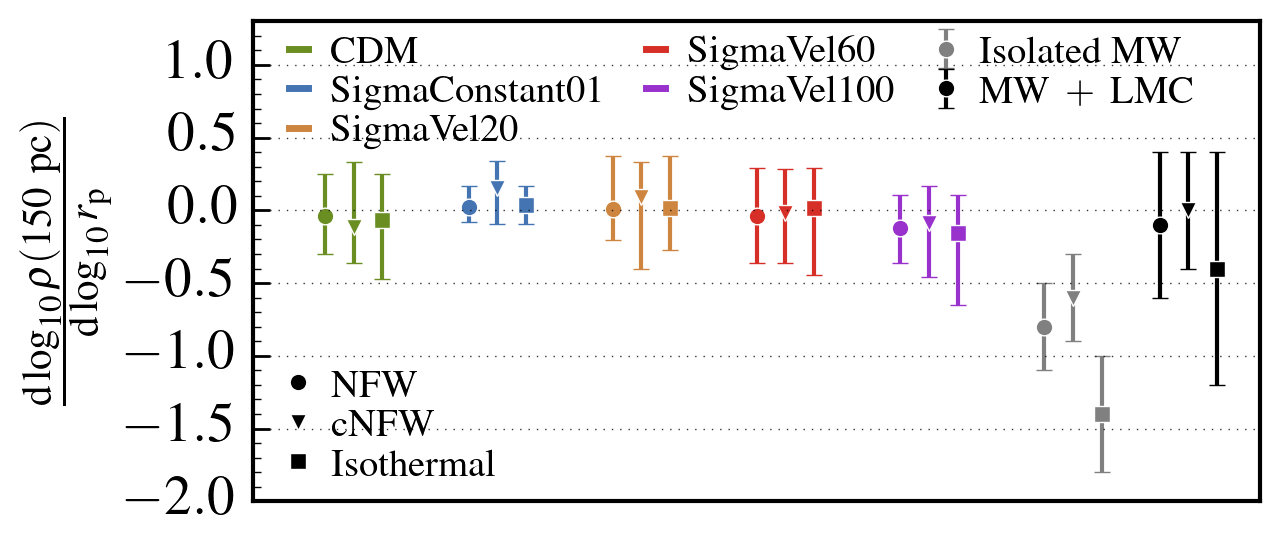

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 3), dpi=200)

for i, (id, id_name) in enumerate(IDs.items()):
    file = h5py.File(DATA_PATH+f"{id}.hdf5", "a")

    q_nfw, q_core_nfw, q_iso = [], [], []
    m_nfw, m_core_nfw, m_iso = [], [], []
    # Add simulations points
    for idx in file.keys():

        if file[f'{idx}'].attrs.get("main_halo_of") is not None:   
            subhalo_idxs = file[f'{idx}'].attrs.get("main_halo_of")

            rp, rho150_nfw, rho150_core_nfw, rho150_iso, M200 = [], [], [], [], []
            counter = 0 
            # Get satellites of MW halo
            for subhalo_idx in subhalo_idxs[:MAX_SATELLITES]:
                if np.log10(file[str(subhalo_idx)]['tree_data']['bound_mass_dm'][0]) > 9: # MINIMUM satellite mass = 10^9
                    data_subhalo = file[f'{subhalo_idx}']

                    # Get pericenter
                    _rp = data_subhalo["tree_data"]["pericenter"][1]
                    _rp = _rp[0] if _rp.shape==(1,) else _rp
                    rp = np.append(rp, _rp)

                    # Get NFW profile
                    nfw_fit = data_subhalo['halo_data']['nfw_fit']
                    r_s, log10_rho_s, sigma_r_s, sigma_log10_rho_s = nfw_fit
                    _rho_150 = 10**fit_nfw_model(np.array([0.15]), r_s, log10_rho_s)
                    rho150_nfw = np.append(rho150_nfw, _rho_150[0])
                    
                    # Get core-NFW profile
                    core_nfw_fit = data_subhalo['halo_data']['core_nfw_fit']
                    log10_M_200, r_c, n, sigma_log10_M200, sigma_r_c, sigma_n = core_nfw_fit
                    _rho_150 = 10**fit_core_nfw_model(np.array([0.15]), log10_M_200, r_c, n)
                    rho150_core_nfw = np.append(rho150_core_nfw, _rho_150[0])
                    
                    # Get ISO profile
                    iso_fit = data_subhalo['halo_data']['iso_fit'][:]
                    r_0, log10_rho_0, sigma_r_0, sigma_log10_rho_0 = iso_fit
                    _rho_150 = 10**fit_isothermal_model(np.array([0.15, 0.15]), r_0, log10_rho_0)
                    rho150_iso = np.append(rho150_iso, _rho_150[0])
                    
                    counter +=1
            
            if counter<8: continue # Fit only systems with at least 8 satellites
            # Fit NFW
            _q, _m = run_best_fit_for_sim(rp, rho150_nfw)
            q_nfw = np.append(q_nfw, _q)
            m_nfw = np.append(m_nfw, _m)
            
            # Fit core-NFW
            _q, _m = run_best_fit_for_sim(rp, rho150_core_nfw)
            q_core_nfw = np.append(q_core_nfw, _q)
            m_core_nfw = np.append(m_core_nfw, _m)
            
            # Fit ISO
            _q, _m = run_best_fit_for_sim(rp, rho150_iso)
            q_iso = np.append(q_iso, _q)
            m_iso = np.append(m_iso, _m)
    

    merr = np.zeros((2, 1))
    merr[0,0]= np.median(m_nfw) - np.percentile(m_nfw,16)
    merr[1,0]= np.percentile(m_nfw,84) - np.median(m_nfw)
    plt.errorbar(np.array([i]), np.array(np.median(m_nfw)), yerr=merr, marker='o', markersize=6, color=color_list[i],
                 markeredgecolor="white", ls='none', lw=1.5) #, label=fr'$\mathrm{{{id_name}}}$')
    print(f"{id_name} NFW: {np.median(m_nfw), np.percentile(m_nfw,16), np.percentile(m_nfw,84)}")
    
    merr = np.zeros((2, 1))
    merr[0,0]= np.median(m_core_nfw) - np.percentile(m_core_nfw,16)
    merr[1,0]= np.percentile(m_core_nfw,84) - np.median(m_core_nfw)
    plt.errorbar(np.array([i])+0.2, np.array(np.median(m_core_nfw)), yerr=merr, marker='v', markersize=6, color=color_list[i],
                 markeredgecolor="white", ls='none', lw=1.5) #, label=fr'$\mathrm{{{id_name}}}$')
    print(f"{id_name} cNFW: {np.median(m_core_nfw), np.percentile(m_core_nfw,16), np.percentile(m_core_nfw,84)}")
    
    merr = np.zeros((2, 1))
    merr[0,0]= np.median(m_iso) - np.percentile(m_iso,16)
    merr[1,0]= np.percentile(m_nfw,84) - np.median(m_iso)
    plt.errorbar(np.array([i])+0.4, np.array(np.median(m_iso)), yerr=merr, marker='s', markersize=6, color=color_list[i],
                 markeredgecolor="white", ls='none', lw=1.5) #, label=fr'$\mathrm{{{id_name}}}$')
    print(f"{id_name} ISO: {np.median(m_iso), np.percentile(m_iso,16), np.percentile(m_iso,84)}")
    
    plt.plot([], [], color=color_list[i], lw=2.5, label=fr'$\mathrm{{{id_name}}}$')

    ####
    file.close()

plt.grid('True')
# Plot rho_K19NFW + rp P20
plt.errorbar(np.array([i+1]), np.array(-0.8), yerr=np.ones((2, 1))*0.3, marker='o', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, label=r'$\mathrm{Isolated\ MW}$', color='grey')
# Plot rho_R19 + rp P20
plt.errorbar(np.array([i+1.2]), np.array(-0.6), yerr=np.ones((2, 1))*0.3, marker='v', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, color='grey')
# Plot rho_K19ISO + rp P20
plt.errorbar(np.array([i+1.4]), np.array(-1.4), yerr=np.ones((2, 1))*0.4, marker='s', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, color='grey')

# Plot rho_K19NFW + rp B20 (+LMC)
plt.errorbar(np.array([i+1.8]), np.array(-0.1), yerr=np.ones((2, 1))*0.5, marker='o', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, label=r'$\mathrm{MW\ +\ LMC}$', color='black')
# Plot rho_R19 + rp B20 (+LMC)
plt.errorbar(np.array([i+2.0]), np.array(0), yerr=np.ones((2, 1))*0.4, marker='v', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, color='black')
# Plot rho_K19ISO + rp B20 (+LMC)
plt.errorbar(np.array([i+2.2]), np.array(-0.4), yerr=np.ones((2, 1))*0.8, marker='s', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, color='black')

plt.xticks([])
plt.xlim([-0.5, 6.5])
plt.ylim([-2.0, 1.3])
plt.ylabel(r'$\frac{{\mathrm{d}}\log_{10}\rho(150\ \mathrm{pc})}{{\mathrm{d}}\log_{10}r_{\mathrm{p}}}$')

ax.legend(loc=[0.02,0.7], labelspacing=0.1, handlelength=0.5, handletextpad=0.6, frameon=False, fontsize=14, ncol=3, columnspacing=1, numpoints=1)

ax2 = ax.twinx()
ax2.axis('off')
ax2.errorbar([], [], yerr=[], marker='o', markersize=6, color='k', markeredgecolor="white", ls='none', lw=0, label=r'$\mathrm{NFW}$')
ax2.errorbar([], [], yerr=[], marker='v', markersize=6, color='k', markeredgecolor="white", ls='none', lw=0, label=r'$\mathrm{cNFW}$')
ax2.errorbar([], [], yerr=[], marker='s', markersize=6, color='k', markeredgecolor="white", ls='none', lw=0, label=r'$\mathrm{Isothermal}$')
ax2.legend(loc=[0.02,0.005], ncol=1, labelspacing=0.1, handlelength=0.5, handletextpad=0.6, 
           edgecolor='white', frameon=False, facecolor='goldenrod', framealpha=0.3, fontsize=14, columnspacing=1, numpoints=1)

####
plt.savefig(f'figures/Density_pericenter_slope_best_fit_Cardona.png', dpi=300)
plt.show()

#### Best fit adding all our fitted combinations

CDM NFW: (-0.03961296908159897, -0.29773965777694966, 0.2492545875984426)
CDM cNFW: (-0.11630671443324095, -0.36275003376199694, 0.33512596010397017)
CDM ISO: (-0.06902493507371282, -0.47049024527757954, 0.23653643102632443)
SigmaConstant01 NFW: (0.02140639894041756, -0.08171521098680032, 0.16491847344059662)
SigmaConstant01 cNFW: (0.15691348326975374, -0.09637395161340502, 0.3386477741216314)
SigmaConstant01 ISO: (0.033565349197643556, -0.09585062071440488, 0.2630117573907281)
SigmaVel20 NFW: (0.007072499099923463, -0.20626171029163173, 0.37527183201259945)
SigmaVel20 cNFW: (0.08978601901632585, -0.4008670855910445, 0.3311089430264075)
SigmaVel20 ISO: (0.019391631187747897, -0.2700872850703631, 0.396709663372486)
SigmaVel60 NFW: (-0.039529140108166695, -0.3649624663847081, 0.29153579219239734)
SigmaVel60 cNFW: (-0.01805538441754725, -0.36006354715910405, 0.28756856749297244)
SigmaVel60 ISO: (0.01932112297999282, -0.4466206322368955, 0.2731871665440923)
SigmaVel100 NFW: (-0.12031447231

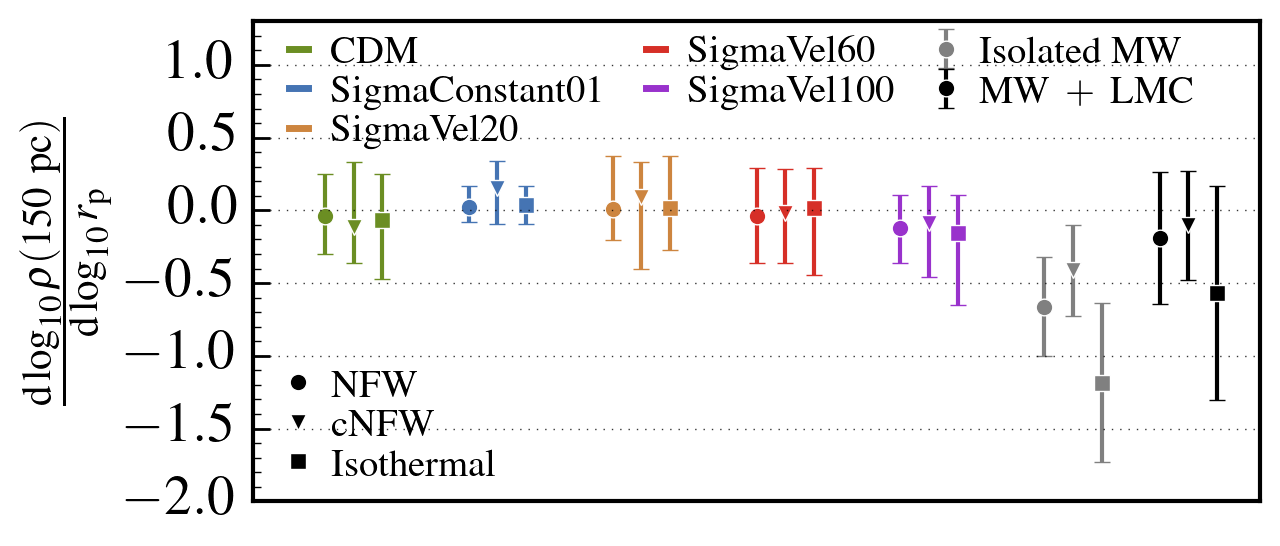

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 3), dpi=200)

for i, (id, id_name) in enumerate(IDs.items()):
    file = h5py.File(DATA_PATH+f"{id}.hdf5", "a")

    q_nfw, q_core_nfw, q_iso = [], [], []
    m_nfw, m_core_nfw, m_iso = [], [], []
    # Add simulations points
    for idx in file.keys():

        if file[f'{idx}'].attrs.get("main_halo_of") is not None:   
            subhalo_idxs = file[f'{idx}'].attrs.get("main_halo_of")

            rp, rho150_nfw, rho150_core_nfw, rho150_iso, M200 = [], [], [], [], []
            counter = 0 
            # Get satellites of MW halo
            for subhalo_idx in subhalo_idxs[:MAX_SATELLITES]:
                if np.log10(file[str(subhalo_idx)]['tree_data']['bound_mass_dm'][0]) > 9: # MINIMUM satellite mass = 10^9
                    data_subhalo = file[f'{subhalo_idx}']

                    # Get pericenter
                    _rp = data_subhalo["tree_data"]["pericenter"][1]
                    _rp = _rp[0] if _rp.shape==(1,) else _rp
                    rp = np.append(rp, _rp)

                    # Get NFW profile
                    nfw_fit = data_subhalo['halo_data']['nfw_fit']
                    r_s, log10_rho_s, sigma_r_s, sigma_log10_rho_s = nfw_fit
                    _rho_150 = 10**fit_nfw_model(np.array([0.15]), r_s, log10_rho_s)
                    rho150_nfw = np.append(rho150_nfw, _rho_150[0])
                    
                    # Get core-NFW profile
                    core_nfw_fit = data_subhalo['halo_data']['core_nfw_fit']
                    log10_M_200, r_c, n, sigma_log10_M200, sigma_r_c, sigma_n = core_nfw_fit
                    _rho_150 = 10**fit_core_nfw_model(np.array([0.15]), log10_M_200, r_c, n)
                    rho150_core_nfw = np.append(rho150_core_nfw, _rho_150[0])
                    
                    # Get ISO profile
                    iso_fit = data_subhalo['halo_data']['iso_fit'][:]
                    r_0, log10_rho_0, sigma_r_0, sigma_log10_rho_0 = iso_fit
                    _rho_150 = 10**fit_isothermal_model(np.array([0.15, 0.15]), r_0, log10_rho_0)
                    rho150_iso = np.append(rho150_iso, _rho_150[0])
                    
                    counter +=1
            
            if counter<8: continue # Fit only systems with at least 8 satellites
            # Fit NFW
            _q, _m = run_best_fit_for_sim(rp, rho150_nfw)
            q_nfw = np.append(q_nfw, _q)
            m_nfw = np.append(m_nfw, _m)
            
            # Fit core-NFW
            _q, _m = run_best_fit_for_sim(rp, rho150_core_nfw)
            q_core_nfw = np.append(q_core_nfw, _q)
            m_core_nfw = np.append(m_core_nfw, _m)
            
            # Fit ISO
            _q, _m = run_best_fit_for_sim(rp, rho150_iso)
            q_iso = np.append(q_iso, _q)
            m_iso = np.append(m_iso, _m)
    

    merr = np.zeros((2, 1))
    merr[0,0]= np.median(m_nfw) - np.percentile(m_nfw,16)
    merr[1,0]= np.percentile(m_nfw,84) - np.median(m_nfw)
    plt.errorbar(np.array([i]), np.array(np.median(m_nfw)), yerr=merr, marker='o', markersize=6, color=color_list[i],
                 markeredgecolor="white", ls='none', lw=1.5) #, label=fr'$\mathrm{{{id_name}}}$')
    print(f"{id_name} NFW: {np.median(m_nfw), np.percentile(m_nfw,16), np.percentile(m_nfw,84)}")
    
    merr = np.zeros((2, 1))
    merr[0,0]= np.median(m_core_nfw) - np.percentile(m_core_nfw,16)
    merr[1,0]= np.percentile(m_core_nfw,84) - np.median(m_core_nfw)
    plt.errorbar(np.array([i])+0.2, np.array(np.median(m_core_nfw)), yerr=merr, marker='v', markersize=6, color=color_list[i],
                 markeredgecolor="white", ls='none', lw=1.5) #, label=fr'$\mathrm{{{id_name}}}$')
    print(f"{id_name} cNFW: {np.median(m_core_nfw), np.percentile(m_core_nfw,16), np.percentile(m_core_nfw,84)}")
    
    merr = np.zeros((2, 1))
    merr[0,0]= np.median(m_iso) - np.percentile(m_iso,16)
    merr[1,0]= np.percentile(m_nfw,84) - np.median(m_iso)
    plt.errorbar(np.array([i])+0.4, np.array(np.median(m_iso)), yerr=merr, marker='s', markersize=6, color=color_list[i],
                 markeredgecolor="white", ls='none', lw=1.5) #, label=fr'$\mathrm{{{id_name}}}$')
    print(f"{id_name} ISO: {np.median(m_iso), np.percentile(m_iso,16), np.percentile(m_iso,84)}")
    
    plt.plot([], [], color=color_list[i], lw=2.5, label=fr'$\mathrm{{{id_name}}}$')

    ####
    file.close()

plt.grid('True')
# Plot rho_K19NFW + rp P20
plt.errorbar(np.array([i+1]), popt_p_Isolated[1], yerr=np.ones((2, 1))*perr_p_Isolated[1], marker='o', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, label=r'$\mathrm{Isolated\ MW}$', color='grey')
# Plot rho_R19 + rp P20
plt.errorbar(np.array([i+1.2]), popt_p_Isolated_cNFW[1], yerr=np.ones((2, 1))*perr_p_Isolated_cNFW[1], marker='v', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, color='grey')
# Plot rho_K19ISO + rp P20
plt.errorbar(np.array([i+1.4]), popt_p_Isolated_ISO[1], yerr=np.ones((2, 1))*perr_p_Isolated_ISO[1], marker='s', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, color='grey')

# Plot rho_K19NFW + rp B20 (+LMC)
plt.errorbar(np.array([i+1.8]), popt_p_LMC[1], yerr=np.ones((2, 1))*perr_p_LMC[1], marker='o', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, label=r'$\mathrm{MW\ +\ LMC}$', color='black')
# Plot rho_R19 + rp B20 (+LMC)
plt.errorbar(np.array([i+2.0]), popt_p_LMC_cNFW[1], yerr=np.ones((2, 1))*perr_p_LMC_cNFW[1], marker='v', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, color='black')
# Plot rho_K19ISO + rp B20 (+LMC)
plt.errorbar(np.array([i+2.2]), popt_p_LMC_ISO[1], yerr=np.ones((2, 1))*perr_p_LMC_ISO[1], marker='s', markersize=6, 
            markeredgecolor="white", ls='none', lw=1.5, color='black')

plt.xticks([])
plt.xlim([-0.5, 6.5])
plt.ylim([-2.0, 1.3])
plt.ylabel(r'$\frac{{\mathrm{d}}\log_{10}\rho(150\ \mathrm{pc})}{{\mathrm{d}}\log_{10}r_{\mathrm{p}}}$')

ax.legend(loc=[0.02,0.7], labelspacing=0.1, handlelength=0.5, handletextpad=0.6, frameon=False, fontsize=14, ncol=3, columnspacing=1, numpoints=1)

ax2 = ax.twinx()
ax2.axis('off')
ax2.errorbar([], [], yerr=[], marker='o', markersize=6, color='k', markeredgecolor="white", ls='none', lw=0, label=r'$\mathrm{NFW}$')
ax2.errorbar([], [], yerr=[], marker='v', markersize=6, color='k', markeredgecolor="white", ls='none', lw=0, label=r'$\mathrm{cNFW}$')
ax2.errorbar([], [], yerr=[], marker='s', markersize=6, color='k', markeredgecolor="white", ls='none', lw=0, label=r'$\mathrm{Isothermal}$')
ax2.legend(loc=[0.02,0.005], ncol=1, labelspacing=0.1, handlelength=0.5, handletextpad=0.6, 
           edgecolor='white', frameon=False, facecolor='goldenrod', framealpha=0.3, fontsize=14, columnspacing=1, numpoints=1)

####
# plt.savefig(f'figures/Density_pericenter_slope_best_fit.png', dpi=300)
plt.show()

### How many?

In [9]:
MAX_SATELLITES = None

filename = f"./outputs/fit_slope_NFW+cNFW+ISO_{MAX_SATELLITES}.npy" if MAX_SATELLITES is not None else "./outputs/fit_slope_NFW+cNFW+ISO.npy"
m_save_NFW, m_save_cNFW, m_save_ISO = np.load(filename, allow_pickle=True)

for i, (id, id_name) in enumerate(IDs.items()):
    file = h5py.File(DATA_PATH+f"{id}.hdf5", "a")
        
    print(id_name)
    
    m_nfw = m_save_NFW[i]
    m_core_nfw = m_save_cNFW[i]
    m_iso = m_save_ISO[i]
        
    print("NFW")
    print('m<-0.5:', (m_nfw < -0.5).sum()/len(m_nfw))
    print('m<-0.4:', (m_nfw < -0.4).sum()/len(m_nfw))
    print('m<-0.3:', (m_nfw < -0.3).sum()/len(m_nfw))
    print(f"{id_name} NFW: {np.median(m_nfw)}")
    
    print("cNFW")
    print('m<-0.5:', (m_core_nfw < -0.5).sum()/len(m_core_nfw))
    print('m<-0.4:', (m_core_nfw < -0.4).sum()/len(m_core_nfw))
    print('m<-0.3:', (m_core_nfw < -0.3).sum()/len(m_core_nfw))
    print(f"{id_name} NFW: {np.median(m_core_nfw)}")
    
    print("ISO")
    print('m<-0.5:', (m_iso< - 0.5).sum()/len(m_iso))
    print('m<-0.4:', (m_iso < -0.4).sum()/len(m_iso))
    print('m<-0.3:', (m_iso< - 0.3).sum()/len(m_iso))
    print(f"{id_name} NFW: {np.median(m_iso)}")
    
    print(" ")
    ####
    file.close()

CDM
NFW
m<-0.5: 0.0
m<-0.4: 0.0
m<-0.3: 0.12
CDM NFW: -0.08939402971655194
cNFW
m<-0.5: 0.0
m<-0.4: 0.04
m<-0.3: 0.16
CDM NFW: -0.09607800737805573
ISO
m<-0.5: 0.0
m<-0.4: 0.04
m<-0.3: 0.16
CDM NFW: -0.09607800737805573
 
SigmaConstant01
NFW
m<-0.5: 0.0
m<-0.4: 0.0
m<-0.3: 0.0
SigmaConstant01 NFW: -0.049097502615714134
cNFW
m<-0.5: 0.0
m<-0.4: 0.0
m<-0.3: 0.0
SigmaConstant01 NFW: 0.004028840540832122
ISO
m<-0.5: 0.0
m<-0.4: 0.0
m<-0.3: 0.0
SigmaConstant01 NFW: 0.004028840540832122
 
SigmaVel20
NFW
m<-0.5: 0.0
m<-0.4: 0.0
m<-0.3: 0.12
SigmaVel20 NFW: -0.07028598682487522
cNFW
m<-0.5: 0.0
m<-0.4: 0.04
m<-0.3: 0.08
SigmaVel20 NFW: 0.018713896243552207
ISO
m<-0.5: 0.0
m<-0.4: 0.04
m<-0.3: 0.08
SigmaVel20 NFW: 0.018713896243552207
 
SigmaVel60
NFW
m<-0.5: 0.0
m<-0.4: 0.038461538461538464
m<-0.3: 0.23076923076923078
SigmaVel60 NFW: -0.024962289808951828
cNFW
m<-0.5: 0.038461538461538464
m<-0.4: 0.11538461538461539
m<-0.3: 0.19230769230769232
SigmaVel60 NFW: -0.024828395737063844
ISO
m<-0.5: 